<a href="https://colab.research.google.com/github/Omkardixit18/Tumer-scanner/blob/main/tumerscannsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./225,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [3]:
train_data = datagen.flow_from_directory('/content/drive/My Drive/AI workshop/brain scan',target_size=(224,224),batch_size=10,class_mode='binary')

Found 3137 images belonging to 4 classes.


In [4]:
train_data.class_indices

{'TEST': 0, 'no': 1, 'pred': 2, 'yes': 3}

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
cnn_model=Sequential()
cnn_model.add(Convolution2D(32,3,3,input_shape=(224,224,3),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Convolution2D(32,3,3,activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(1,activation='sigmoid'))
cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
train_data.class_indices

{'TEST': 0, 'no': 1, 'pred': 2, 'yes': 3}

In [7]:
cnn_model.fit(train_data,epochs=2)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
314/314 ━━━━━━━━━━━━━━━━━━━━ 676s 2s/step - accuracy: 0.4877 - loss: -1569629.1250
Epoch 2/2
314/314 ━━━━━━━━━━━━━━━━━━━━ 80s 230ms/step - accuracy: 0.4838 - loss: -154702704.0000


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
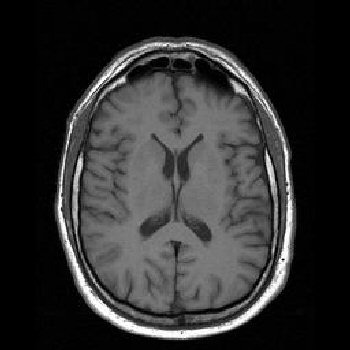

In [8]:
from skimage.io import imread
img=imread('/content/drive/My Drive/AI workshop/pred1.jpg')
img

In [9]:
from skimage.transform import resize
img=resize(img,(224,224))
img.shape

(224, 224, 3)

In [10]:
import numpy as np
img=np.expand_dims(img,axis=0)
img.shape

(1, 224, 224, 3)

In [11]:
a=cnn_model.predict(img)
print(a)
print((a>.5).astype(int))
result=(a>.5).astype(int)
if result==0:
  print("No tumor available")
else:
  print("Tumor available")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[1.]]
[[1]]
Tumor available
